In [0]:
import pandas as pd
import numpy as np
import re


from numpy import array
from tensorflow.keras.preprocessing.text import one_hot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, LSTM, Dropout, Dense, Flatten, Input,  Embedding, Conv1D, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score, classification_report, auc, roc_curve, accuracy_score

In [2]:
from keras.datasets import mnist
import numpy as np
(train_images, _), (test_images, _) = mnist.load_data()
print (train_images.shape)
print (test_images.shape)

Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)


In [3]:
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))

test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

print (train_images.shape)
print (test_images.shape)

(60000, 784)
(10000, 784)


In [4]:

from keras.layers import Input, Dense
from keras.models import Model


encoding_dim = 32  

# the input layer with 784 features
input_layer = Input(shape=(784,))
# the only hidden layer or the encoded layer with 32 dimensions
encoder_layer1 = Dense(encoding_dim, activation='relu')(input_layer)
# the decoded layer with again 784 features
decoder_layer1 = Dense(784, activation='sigmoid')(encoder_layer1)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoder_layer1)
autoencoder.summary() 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [0]:
encoder = Model(input_layer, encoder_layer1)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))



In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
epochs = 60
batch_size = 256


autoencoder.fit(train_images, train_images,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(test_images, test_images))

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 2s 41us/step - loss: 0.3573 - val_loss: 0.2718
Epoch 2/60
60000/60000 [==============================] - 2s 37us/step - loss: 0.2657 - val_loss: 0.2562
Epoch 3/60
60000/60000 [==============================] - 2s 37us/step - loss: 0.2453 - val_loss: 0.2319
Epoch 4/60
60000/60000 [==============================] - 2s 37us/step - loss: 0.2235 - val_loss: 0.2134
Epoch 5/60
60000/60000 [==============================] - 2s 36us/step - loss: 0.2083 - val_loss: 0.2008
Epoch 6/60
60000/60000 [==============================] - 2s 37us/step - loss: 0.1973 - val_loss: 0.1911
Epoch 7/60
60000/60000 [==============================] - 2s 36us/step - loss: 0.1884 - val_loss: 0.1831
Epoch 8/60
60000/60000 [==============================] - 2s 36us/step - loss: 0.1812 - val_loss: 0.1767
Epoch 9/60
60000/60000 [==============================] - 2s 36us/step - loss: 0.1753 - val_loss: 0.1712
Epoch

In [11]:
encoded_imgs = encoder.predict(test_images)
print(encoded_imgs.shape)

(10000, 32)


In [0]:
decoded_imgs = decoder.predict(encoded_imgs)

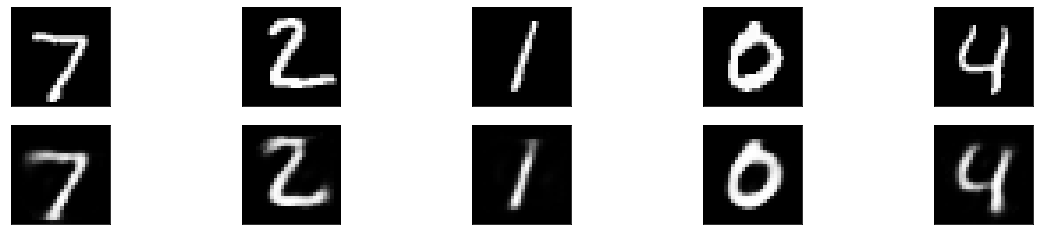

In [9]:

import matplotlib.pyplot as plt

n = 5  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()